# Grundlagen
Ziel ist es, aus den bestehenden Daten geeignete Features zu extrahieren.

Grundlage hierfür sind bereits zusammengeführte csv-Dateien aus EML* und FRE* csv-Dateien. Dabei ist bereits der Zeitstempel gemappt. Und eine Vorauswahl der Spalten hat basierend auf der Datenbeschreibung (s. Nuclino) stattgefunden.

Somit hat ein DataFrame folgende Spalten: DeFA_Hoehenwert_VL_00, DeFA_Hoehenwert_VR_00, DeFA_Hoehenwert_HL_00, DeFA_Hoehenwert_HR_00, ts_relative, DeAccX, DeAccY, DeAccZ, DeCurvature, DeDrivingDirectionPRange, DePitchAngle2Gravity, DePitchRate, DeRollAngle2Gravity, DeRollRate, DeVelocityX, DeVelocityY, DeYawAngle, DeYawRate, DePositionX, DePositionY, DePositionXmm, DePositionYmm

# Imports

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [4]:
def new_position(pos_int, pos_mm):
    return pos_int + pos_mm/1000

# Code

## Daten einlesen
Daten aus csv einlesen und anpassen
- Zeitstempel auf Sekunden mappen
- PositionX bzw Y und PositionXmm bzw Ymm zusammenführen und mm Spalten löschen

In [5]:
# read data from csv file
directory = "C:\\Users\\katri\\\Documents\\Studium\\Master\\2. Semester\\Projekt\\1_Daten\\01_Messdaten_woVideo_woGPS\\02_merged"
filename = "20180606125728_merged.csv"
path = os.path.join(directory, filename)
data = data = pd.read_csv(path, sep=';')
data['ts_relative'] = data['ts_relative'].apply(lambda x: x/1000000)
data['DePositionX'] = data['DePositionX'].apply(lambda x: new_position(x, data['DePositionXmm']))
data['DePositionY'] = data['DePositionY'].apply(lambda x: new_position(x, data['DePositionYmm']))
data = data.drop('DePositionXmm', 1).drop('DePositionYmm', 1)

## Daten normalisieren
Normalisieren der Daten, um eine bessere vergleichbare Skala beim Plotting zu haben. Alle Spalten außer dem Zeitstempel werden normalisiert.

In [6]:
headers = data.dtypes.index
    
#df_normalized.dtypes
data_normalized=((data-data.min())/(data.max()-data.min()))
data_normalized['ts_relative'] = data['ts_relative']
data_normalized.dtypes.index = data.dtypes.index

## Plotting
Zunächst einmal alle Signale einzeln plottten, um Signale zu erkennen, die evtl gar keine Änderung aufweisen oder aus anderen Gründen nicht relevant sein könnten

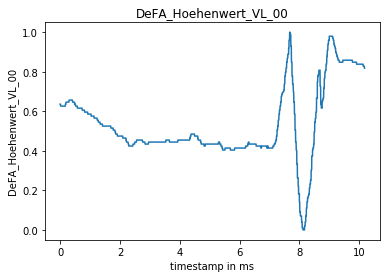

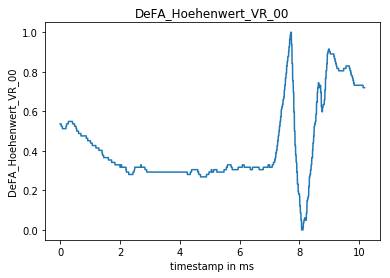

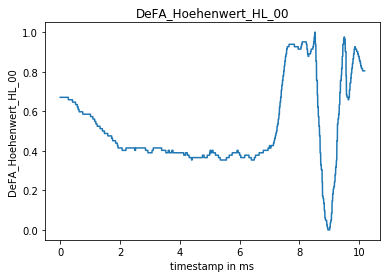

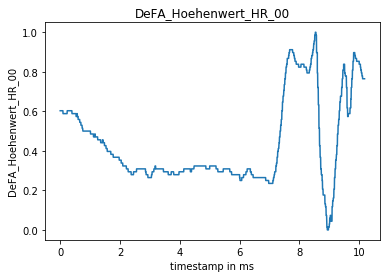

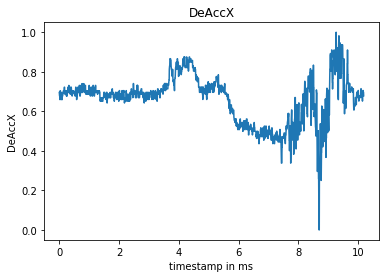

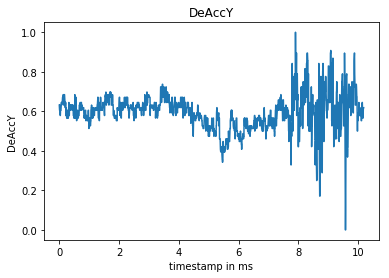

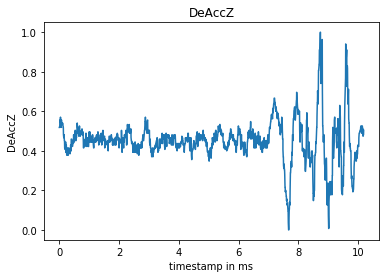

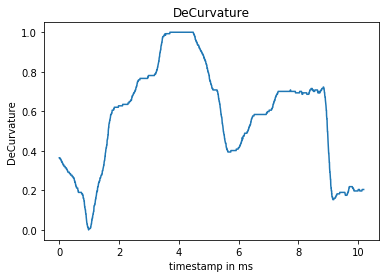

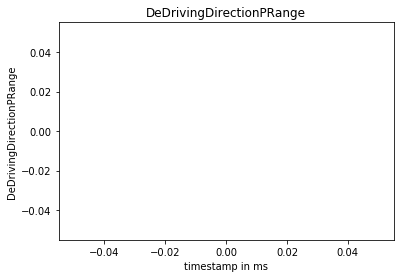

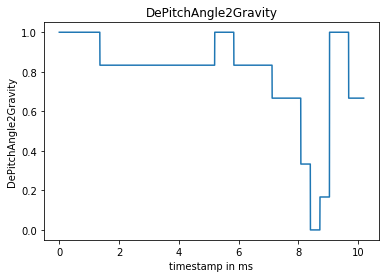

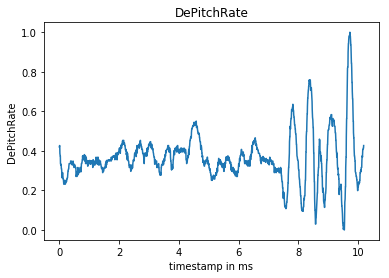

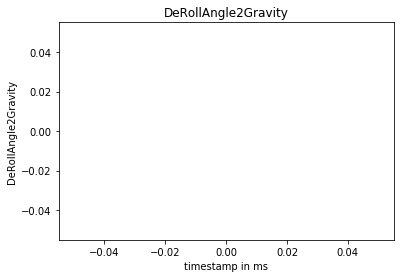

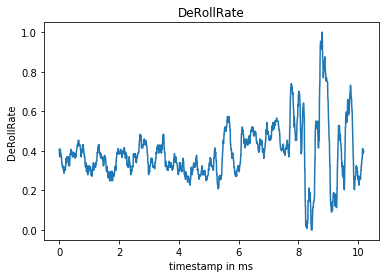

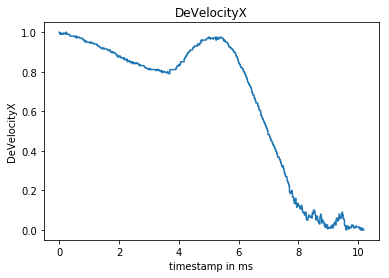

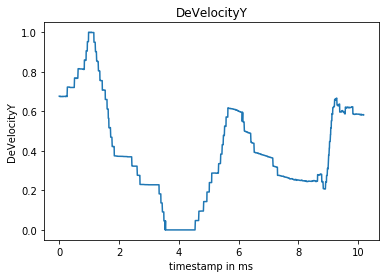

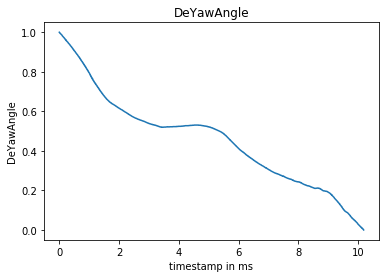

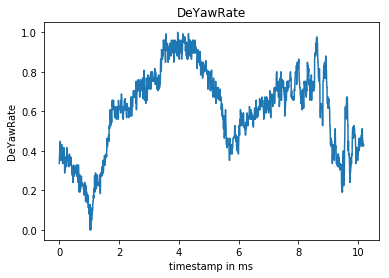

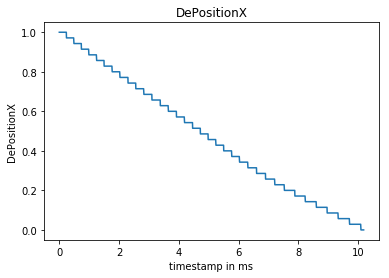

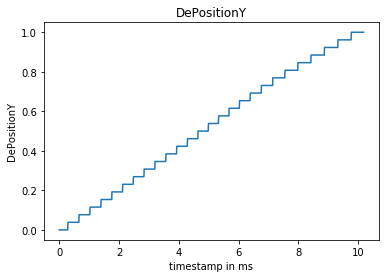

In [7]:
# plot all columns in seperated plots
for header_name in headers:
    if header_name != "ts_relative":
        plt.plot('ts_relative', header_name, data=data_normalized)
        plt.xlabel('timestamp in ms')
        plt.ylabel(header_name)
        plt.title(header_name)
        plt.show()

Spalten die ich aussortieren würde:

- DeDrivingDirectionPRange (muss 1 sein, ansonsten Daten nicht berücksichtigen -> Betrachtung beim Einlesen und dann Verwerfen des Datensatzes)
- DePositionX (absolute Fahrtstrecke irrelevant für Auswertung und steigt nur kontinuierlich an)
- DePositionY (Werte meist nicht genau genug, um Auswirkungen der Erhebung auf Position in Plot zu erkennen)

In [8]:
data_normalized.dtypes
data_normalized = data_normalized.drop('DePositionX', 1).\
    drop('DePositionY', 1).\
    drop('DeDrivingDirectionPRange', 1)

### Höhenwerteverlauf verstehen

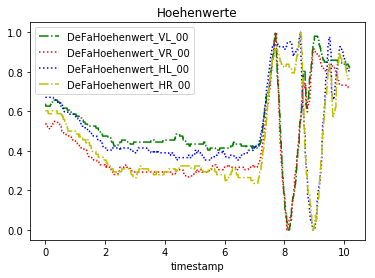

In [9]:
# plot 4 Hoehenwerte
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.', label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VR_00'], 'r:', label='DeFaHoehenwert_VR_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:', label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HR_00'], 'y-.', label='DeFaHoehenwert_HR_00')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte")
plt.show()

**Erkenntnisse:**

Beim *Erkennen* einer Erhebnung werden die Räder zunächst vorne und hinten ausgefahren, um das ganze Auto anzuheben.

Beim *Auffahren* auf die Erhebung wird dieser entgegengewirkt, indem zunächst die Vorderräder "Eingefahren" werden, bis diese die Erhebung verlassen, dann werden sie wieder ausgefahren. Ebenso verhält es sich mit den Hinterrädern.

*Nach Überfahren* des Hindernisses wird die Höhe langsam wieder an den Normalwert angepasst.

### Zusammenhang Höhenwerte - Beschleunigung in X

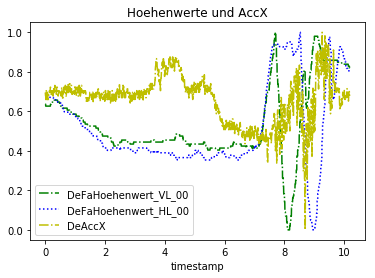

In [10]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeAccZ
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeAccX'], 'y-.',  label='DeAccX')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und AccX")
plt.show()

**Erkenntnis:**

Vor dem Überfahren eines Hindernisses wird die Beschleunigung in X-Richtung normalerweise abnehmen (wenn man nicht mit Vollgas drüber fährt). Also besteht ein Zusammenhang.

### Zusammenhang Höhenwerte - Beschleunigung in Y

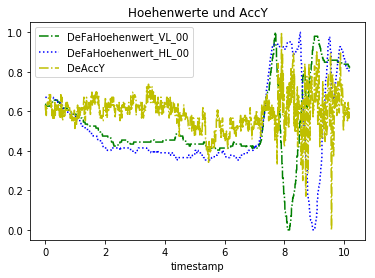

In [11]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeAccY
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeAccY'], 'y-.',  label='DeAccY')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und AccY")
plt.show()

**Erkenntnis:**

Beim Überfahren eines Hindernisses ist ein leichter Ausschlag der Beschleunigung in Y-Richtung zu erkennen (evtl. durch "Instabilität" des Fahrzeugs). Könnte vor allem relevant sein, wenn nur ein Rad über ein Hindernis fährt.

### Zusammenhang Höhenwerte - Beschleunigung in Z

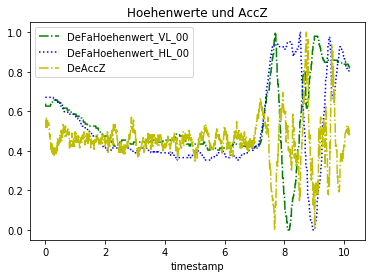

In [12]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeAccZ
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeAccZ'], 'y-.',  label='DeAccZ')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und AccZ")
plt.show()

**Erkenntnis:**

Beim Überfahren des Hindernisses gibt es einen Ausschlag der Beschleunigung in Z, allerdings sollte dieser nicht zu groß sein, wenn die Funktion richtig arbeitet.

### Zusammenhang Höhenwerte - DeCurvature

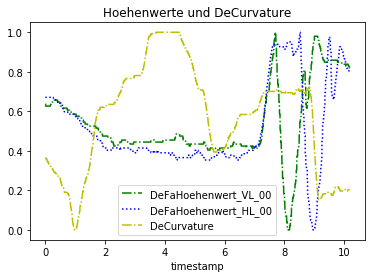

In [13]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeCurvature
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeCurvature'], 'y-.',  label='DeCurvature')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeCurvature")
plt.show()

**Erkenntnis:**

kein direkter Zusammenhang zwischen Kurvenradius und Hindernisüberfahren erkennbar. Spalte eliminieren.

### Zusammenhang Höhenwerte - DePitchRate (Nickwinkel über Zeit)

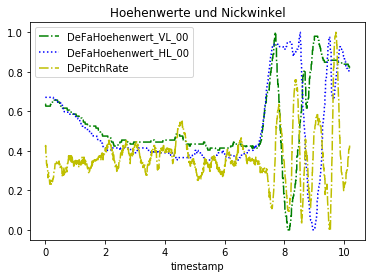

In [14]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DePitchRate
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DePitchRate'], 'y-.',  label='DePitchRate')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und Nickwinkel")
plt.show()

**Erkenntnis:**

Deutlicher Zusammenhang zwischen Fahrzeugnicken und über eine Erhebung fahren

### Zusammenhang Höhenwerte - DePitchAngle2Gravity (Fahrzeugnickwinkel)

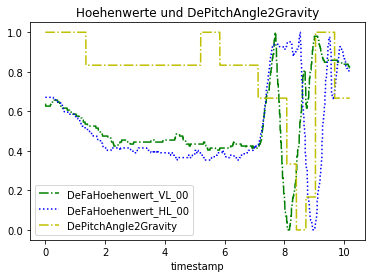

In [15]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DePitchAngle2Gravity
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DePitchAngle2Gravity'], 'y-.',  label='DePitchAngle2Gravity')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DePitchAngle2Gravity")
plt.show()

**Erkenntnis:**

Nicken in Plot erkennbar aber weniger genau als bei PitchRate.

### Zusammenhang Höhenwerte - DeRollAngle2Gravity

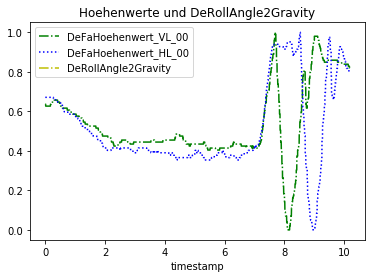

In [16]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeRollAngle2Gravity
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeRollAngle2Gravity'], 'y-.',  label='DeRollAngle2Gravity')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeRollAngle2Gravity")
plt.show()

**Erkenntnis:**

bis jetzt in keinem Datensatz andere Werte als 0 gehabt.

### Zusammenhang Höhenwerte - RollRate (seitliches Kippen über Zeit)

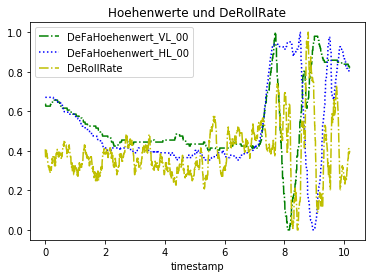

In [17]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeRollRate
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeRollRate'], 'y-.',  label='DeRollRate')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeRollRate")
plt.show()

**Erkenntnis:**

Eindeutiger Zusammenhang zwischen Hindenrisüberfahren und Ausschlag in RollRate erkennbar

### Zusammenhang Höhenwerte - DeVelocityX (Geschwindigkeit in X)

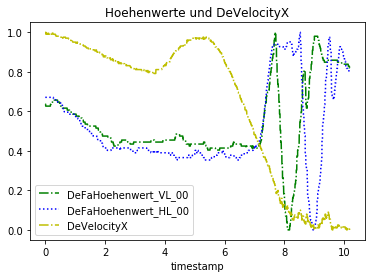

In [18]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeVelocityX
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeVelocityX'], 'y-.',  label='DeVelocityX')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeVelocityX")
plt.show()

**Erkenntnis:**

Wird geringer wenn man über ein Hindernis fährt (Vollgas geht eben nicht) aber weniger Zusammanhang erkennbar als bei Beschleunigung in x -> evtl weglassen.

### Zusammenhang Höhenwerte - DeVelocityY

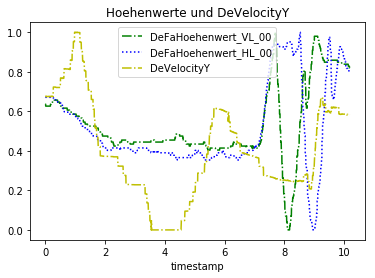

In [19]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeVelocityY
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeVelocityY'], 'y-.',  label='DeVelocityY')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeVelocityY")
plt.show()

**Erkenntnis:**

Geschwindigkeit in Y nimmt zu beim Überfahren eines Hindernisses. Aber auch hier eher die Beschleunigung nutzen und nicht die Geschwindigkeit.

### Zusammanhang Höhenwerte - DeYawAngle

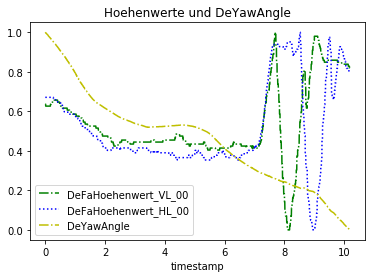

In [20]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeYawAngle
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeYawAngle'], 'y-.',  label='DeYawAngle')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeYawAngle")
plt.show()

**Erkenntnis:**

Zusammenhang möglich, dass leichtes Rotieren um Z-Achse beim Überfahren des Hindernisses vorliegt aber nicht direkt erkennbar.

### Zusammenhang Höhenwerte - DeYawRate

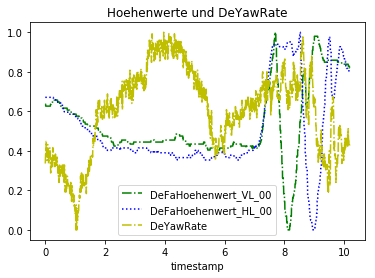

In [21]:
# plot 1 Hoehenwerte Front and 1 Hoehenwert Back and DeYawRate
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_VL_00'], 'g-.',  label='DeFaHoehenwert_VL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeFA_Hoehenwert_HL_00'], 'b:',  label='DeFaHoehenwert_HL_00')
plt.plot(data_normalized['ts_relative'], data_normalized['DeYawRate'], 'y-.',  label='DeYawRate')
plt.legend(loc=0)
plt.xlabel("timestamp")
plt.title("Hoehenwerte und DeYawRate")
plt.show()

**Erkenntnis:**

Erkennbar, dass YawRate beim Überwinden eines Hindernisses sinkt, allerdings tut der Wert das auch an anderen Stellen.